In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [69]:
X = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
y = torch.tensor([[0], [1], [1], [0]], dtype=torch.float32)

In [70]:
class XORModel(nn.Module):
    def __init__(self):
        super(XORModel, self).__init__()
        self.hidden = nn.Linear(2, 2)
        self.output = nn.Linear(2, 1)  
    
    def forward(self, x):
        x = torch.relu(self.hidden(x))  
        x = self.output(x)          
        return x

In [71]:
model = XORModel()
criterion = nn.MSELoss()

Sometimes it is stuck so don't hesitate to relaunch the model and optimize from scratch again

In [73]:
optimizer = optim.Adam(model.parameters(), lr=0.01)
epochs = 1000
with tqdm(total=epochs, desc='Training Process') as pbar:
    for epoch in range(epochs):
        outputs = model(X)
        loss = criterion(outputs, y)

        optimizer.zero_grad()    
        loss.backward() 
        optimizer.step()

        # Update the progress bar
        pbar.set_postfix({'Loss': loss.item()})
        pbar.update(1)  

Training Process: 100%|██████████| 1000/1000 [00:05<00:00, 170.63it/s, Loss=0]      


In [87]:
with torch.no_grad():
    predictions = model(X)
    print("Final outputs after training (probabilities):")
    print(predictions)
    
    # print the weigths and bias
    print("Hidden layer weights and bias:")
    print(model.hidden.weight)
    print(model.hidden.bias)
    print()

    print("Output layer weights and bias:")
    print(model.output.weight)
    print(model.output.bias)

Final outputs after training (probabilities):
tensor([[2.4710e-25],
        [1.0000e+00],
        [1.0000e+00],
        [2.4710e-25]])
Hidden layer weights and bias:
Parameter containing:
tensor([[-1.0925, -1.0925],
        [-0.7705, -0.7705]], requires_grad=True)
Parameter containing:
tensor([1.0284, 1.5296], requires_grad=True)

Output layer weights and bias:
Parameter containing:
tensor([[-1.9595,  1.3174]], requires_grad=True)
Parameter containing:
tensor([2.4710e-25], requires_grad=True)


Let's compute intermediate values

In [88]:
W = np.array([[-1.0925, -1.0925], [-0.7705, -0.7705]])
c = np.array([1.0284, 1.5296])
w = np.array([[-1.9595, 1.3174]])
b = np.array([0])

def relu(x):
    return np.maximum(0, x)

X_test = np.array([[0.0, 0.0], [0.0, 1.0], [1.0, 0.0], [1.0, 1.0]])
print("Manual XOR model outputs (probabilities):")
for i, x in enumerate(X_test):
    print(f"Input X[{i}]: {x}")
    
    hidden_linear = x @ W.T + c
    print(f" X @ W + c: {hidden_linear}")

    hidden_activated = relu(hidden_linear)
    print(f"After RelU: {hidden_activated}")

    output_linear = hidden_activated @ w.T + b
    print(f"Output layer linear output (hidden * w + b): {output_linear}")

    print() 

Manual XOR model outputs (probabilities):
Input X[0]: [0. 0.]
 X @ W + c: [1.0284 1.5296]
After RelU: [1.0284 1.5296]
Output layer linear output (hidden * w + b): [-5.476e-05]

Input X[1]: [0. 1.]
 X @ W + c: [-0.0641  0.7591]
After RelU: [0.     0.7591]
Output layer linear output (hidden * w + b): [1.00003834]

Input X[2]: [1. 0.]
 X @ W + c: [-0.0641  0.7591]
After RelU: [0.     0.7591]
Output layer linear output (hidden * w + b): [1.00003834]

Input X[3]: [1. 1.]
 X @ W + c: [-1.1566 -0.0114]
After RelU: [0. 0.]
Output layer linear output (hidden * w + b): [0.]



Now test with the parameters from the book Deep Learning by Goodfellow et al. (2016) page 170: 

\begin{align}
W = \begin{bmatrix}
1 & 1 \\
1 & 1 \\
\end{bmatrix}, \quad
c = \begin{bmatrix}
0 \\
-1 \\
\end{bmatrix}, \quad
w = \begin{bmatrix}
1 \\
-2 \\
\end{bmatrix}, \quad
b = 0
\end{align}

In [77]:
model_true = XORModel()

with torch.no_grad():
    # Set weights for the hidden layer
    model_true.hidden.weight = nn.Parameter(torch.tensor([[1.0, 1.0], [1.0, 1.0]]))
    model_true.hidden.bias = nn.Parameter(torch.tensor([0.0, -1.0]))
    
    # Set weights for the output layer
    model_true.output.weight = nn.Parameter(torch.tensor([[1.0, -2.0]]))
    model_true.output.bias = nn.Parameter(torch.tensor([0.0]))

In [78]:
with torch.no_grad():
    predictions = model_true(X)  
    print("Final outputs after training (probabilities):")
    print(predictions)

Final outputs after training (probabilities):
tensor([[0.],
        [1.],
        [1.],
        [0.]])


Now let's plot the point with after the two layers with both weights and bias

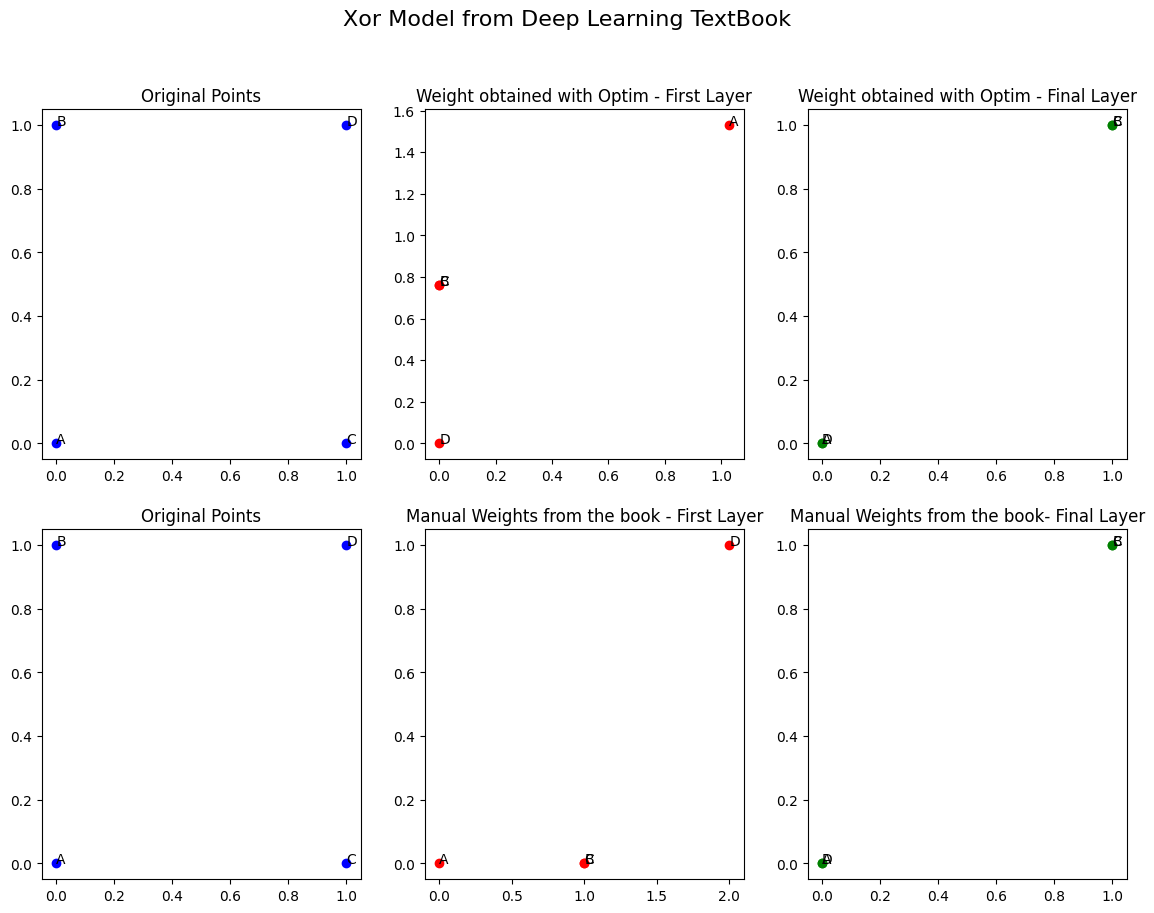

In [100]:
X = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
labels = ['A', 'B', 'C', 'D']

with torch.no_grad():
    hidden_output1 = torch.relu(model.hidden(X))
    final_output1 = torch.relu(model.output(hidden_output1))
    
    hidden_output2 = torch.relu(model_true.hidden(X))
    final_output2 = torch.relu(model_true.output(hidden_output2))

# Plot the results
fig, axs = plt.subplots(2, 3, figsize=(14, 10))

fig.suptitle('Xor Model from Deep Learning TextBook', fontsize=16)
# Original points
axs[0, 0].scatter(X[:, 0], X[:, 1], color='blue')
axs[0, 0].set_title('Original Points')
for i, label in enumerate(labels):
    axs[0, 0].annotate(label, (X[i, 0], X[i, 1]))
    
axs[1, 0].scatter(X[:, 0], X[:, 1], color='blue')
axs[1,0].set_title('Original Points')
for i, label in enumerate(labels):
    axs[1, 0].annotate(label, (X[i, 0], X[i, 1]))

# Model from Deep Learning TextBook but weights are obtained from optimization
axs[0, 1].scatter(hidden_output1[:, 0], hidden_output1[:, 1], color='red')
axs[0, 1].set_title('Weight obtained with Optim - First Layer')
for i, label in enumerate(labels):
    axs[0, 1].annotate(label, (hidden_output1[i, 0], hidden_output1[i, 1]))

axs[0, 2].scatter(final_output1[:, 0], final_output1[:, 0], color='green')
axs[0, 2].set_title('Weight obtained with Optim - Final Layer')
for i, label in enumerate(labels):
    axs[0, 2].annotate(label, (final_output1[i, 0], final_output1[i, 0]))

# Model from Deep Learning TextBook but weights are set manually with the one in the book  
axs[1, 1].scatter(hidden_output2[:, 0], hidden_output2[:, 1], color='red')
axs[1, 1].set_title('Manual Weights from the book - First Layer')
for i, label in enumerate(labels):
    axs[1, 1].annotate(label, (hidden_output2[i, 0], hidden_output2[i, 1]))

axs[1, 2].scatter(final_output2[:, 0], final_output2[:, 0], color='green')
axs[1, 2].set_title('Manual Weights from the book- Final Layer')
for i, label in enumerate(labels):
    axs[1, 2].annotate(label, (final_output2[i, 0], final_output2[i, 0]))


plt.show()